Dataset Link-
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv


In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.shape

(1338, 7)

we have 1338 rows and 7 columns. Our target is "Charge"

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# There are no null values present in the dataset. 
df.isnull().sum().sum()

0

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.columns.value_counts()

age         1
sex         1
bmi         1
children    1
smoker      1
region      1
charges     1
dtype: int64

these are the value counts, these occurances of the columns. 

In [10]:
df.dtypes 

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

These are the datatypes of the features and the targe; the datatypes are assigned as expected: we have int64 datatype for the age and children, object datatype for sex, smoker, region and float64  datatype for bmi and charges. The datatype also suggests that we have both categorical data and numerical data. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Based on this information, we can clearly identify that the dataframe contains information about individuals. The df also presents no null values. 

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This give the statiscal information of the numerical columns. 
we can se no negative values present  we can observe that:

The counts of all the columns are same which means the are no missing values in the dataset.

The mean values is greater than the median(50%) through all the columns which means that the data is skewed to right in these columns.

By summarizeing the data we can observe there is a shuge differences between 75% and max hence there are outliers in the data

We can also notice the Standard deviation is quite very high, we  suspect outliers.

## Data Visualization

<AxesSubplot:>

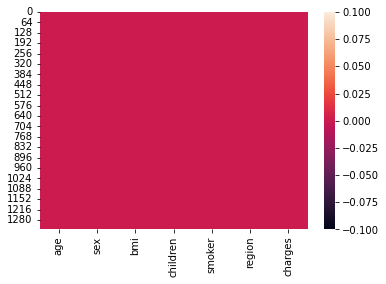

In [13]:
sns.heatmap(df.isnull())

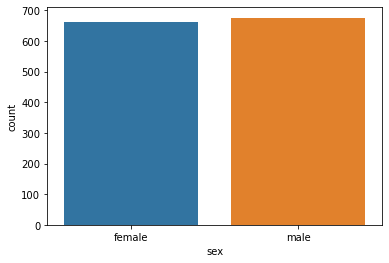

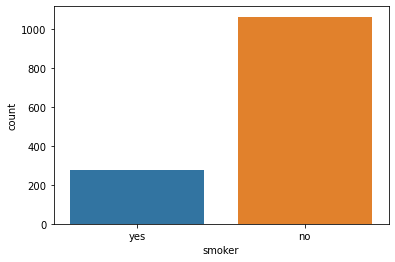

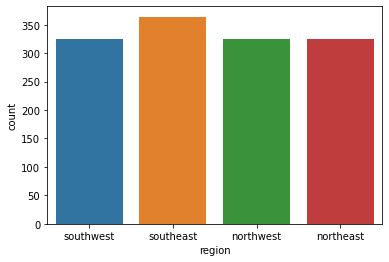

In [14]:
for i in df.columns:
    if df[i].dtype == object:
        ax = sns.countplot(x=i, data=df)
        plt.show() 

The above graphs proposed  shows that there are no difference in counts between the "sex and region" while there is a huge difference in count for the smoker.non smokers tend to take a medical insurrance than the smokers. 

<AxesSubplot:xlabel='sex', ylabel='charges'>

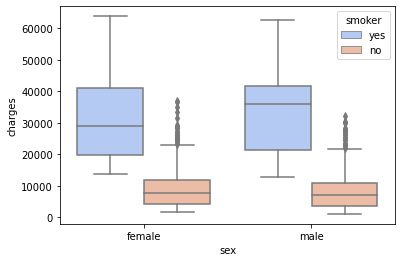

In [14]:
sns.boxplot(x = "sex", y ="charges", hue = "smoker", data = df, palette="coolwarm")

we can observe higher charges for smokers and is not influenced by "sex"

<AxesSubplot:xlabel='smoker', ylabel='charges'>

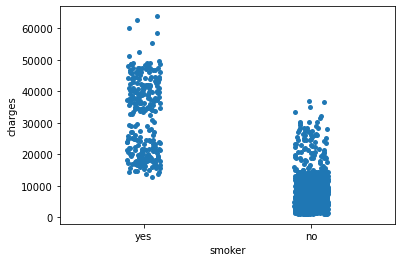

In [51]:
sns.stripplot(x="smoker", y = "charges", data = df)

<AxesSubplot:xlabel='region', ylabel='charges'>

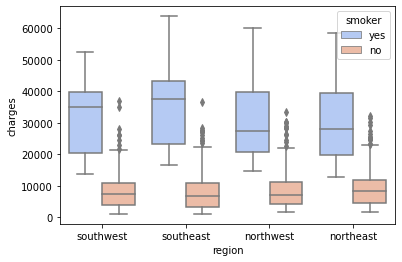

In [28]:
sns.boxplot(x = "region", y ="charges", hue = "smoker", data = df, palette="coolwarm")

we can observe higher charges for smokers and is not influenced by "region"

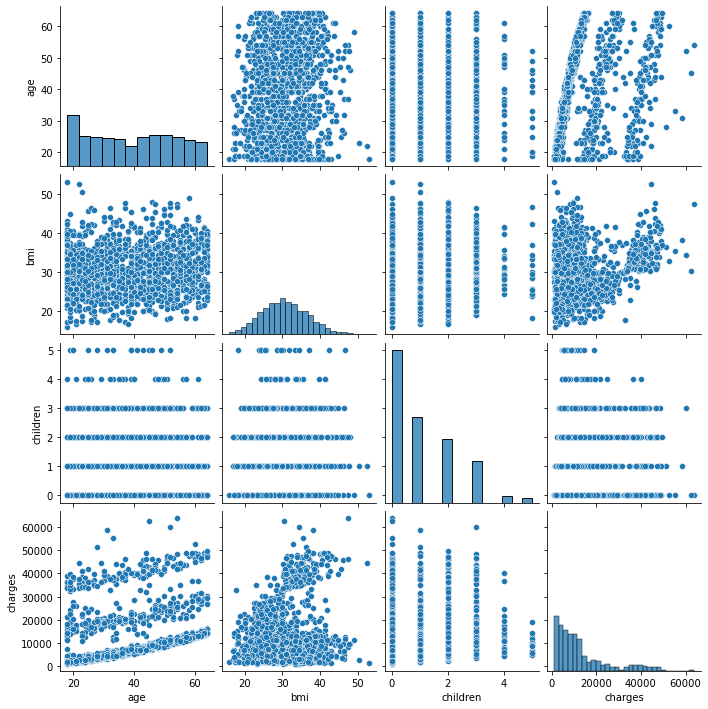

In [34]:
sns.pairplot(df)

## Checking for Skewness 

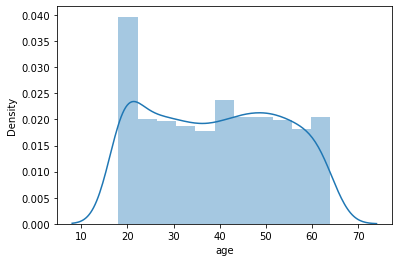

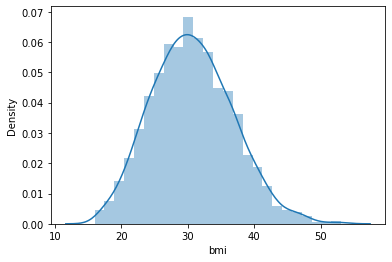

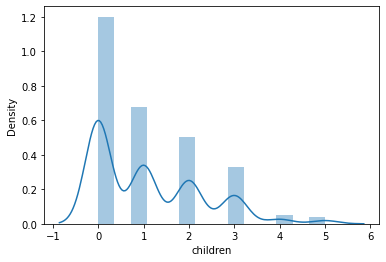

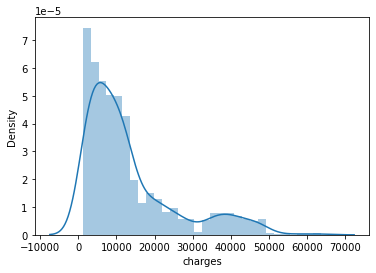

In [9]:
for i in df.columns:
    if df[i].dtype != object:
        ax = sns.distplot(df[i])
        plt.show() 


## Checking for outliers


age            AxesSubplot(0.125,0.536818;0.352273x0.343182)
bmi         AxesSubplot(0.547727,0.536818;0.352273x0.343182)
children          AxesSubplot(0.125,0.125;0.352273x0.343182)
charges        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

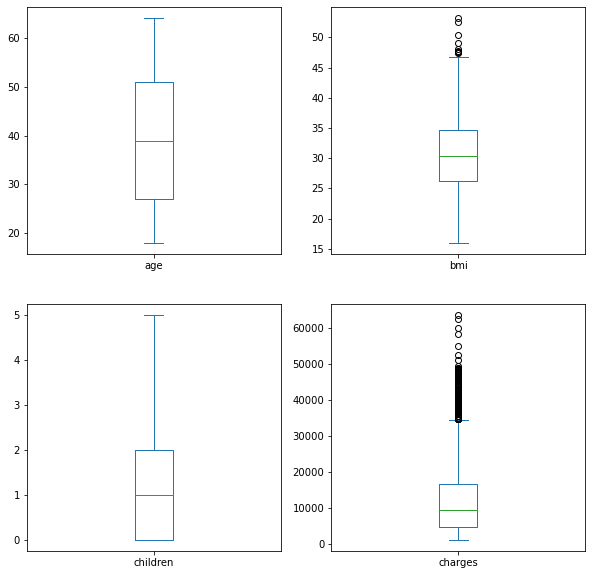

In [18]:
df.plot(kind ="box", subplots=True, layout=(2,2), figsize=(10,10))

The bmi and charges has outliers and we will have to  remove them

 ## Removing Outliers

In [15]:
# from scipy.stats import zscore
from scipy.stats import zscore

outliers_features = df[['bmi', 'charges']]
z = np.abs(zscore(outliers_features))
# threshold = 3
np.where(z>3)


(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317],
       dtype=int64),
 array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64))

In [16]:
df1 = df[(z<3).all(axis=1)]
b = df1.shape
a = df.shape
print(df1.shape)
print( df.shape)

(1327, 7)
(1338, 7)


In [17]:
print("Data Loss Percentage", (((a[0]-b[0])/a[0])*100))

Data Loss Percentage 0.8221225710014948


data loss is less that 10% (as general rule of thumb) therefore it's acceptable the method used. other we would use another method to calculate the data loss

## Skewness Removal

In [18]:
df1.skew()

age         0.055031
bmi         0.203726
children    0.933380
charges     1.453405
dtype: float64

In [19]:
for i in df1.columns:
    if df1[i].dtype != object:
        df1[i] = df1[i].apply(np.cbrt)
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,2.668402,female,3.032970,0.00000,yes,southwest,25.654666
1,2.620741,male,3.232290,1.00000,no,southeast,11.994331
2,3.036589,male,3.207534,1.44225,no,southeast,16.447599
3,3.207534,male,2.831656,0.00000,no,northwest,28.013799
4,3.174802,male,3.068073,0.00000,no,northwest,15.695891


In [20]:
df1.skew()

age        -0.230278
bmi        -0.126801
children   -0.101115
charges     0.490528
dtype: float64

we can see that the skewness has been reduced

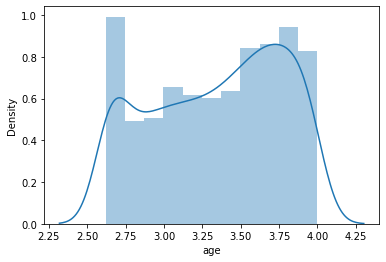

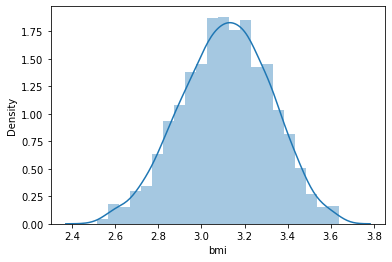

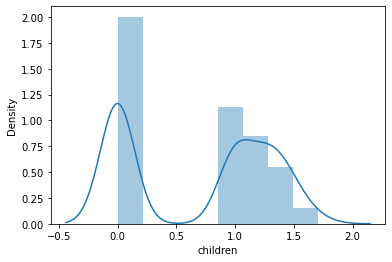

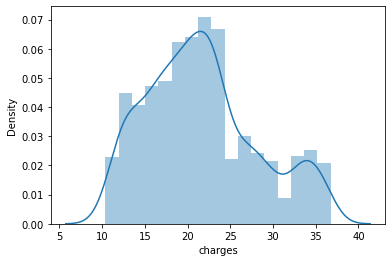

In [51]:
for i in df1.columns:
    if df1[i].dtype != object:
        ax = sns.distplot(df1[i])
        plt.show() 

## ENCODING CATEGORICAL DATA

In [21]:
# Encoding categorical data using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in df1.columns:
    if df1[i].dtypes == "object":
        df1[i] = OE.fit_transform(df1[i].values.reshape(-1,1))

df1.head()

,age,sex,bmi,children,smoker,region,charges
0,2.668402,0.0,3.032970,0.00000,1.0,3.0,25.654666
1,2.620741,1.0,3.232290,1.00000,0.0,2.0,11.994331
2,3.036589,1.0,3.207534,1.44225,0.0,2.0,16.447599
3,3.207534,1.0,2.831656,0.00000,0.0,1.0,28.013799
4,3.174802,1.0,3.068073,0.00000,0.0,1.0,15.695891


I have converted the strings into numbers by using LabelEncoder(), in the "sex" column 0 and 1 represent repectively female and male, in the "smoker" column 0 and 1 represent repectively no and yes, in the "region" column 0,1,2,3 represent repectively northeast,northwest,southeast,southwest

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1327 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1327 non-null   float64
 1   sex       1327 non-null   float64
 2   bmi       1327 non-null   float64
 3   children  1327 non-null   float64
 4   smoker    1327 non-null   float64
 5   region    1327 non-null   float64
 6   charges   1327 non-null   float64
dtypes: float64(7)
memory usage: 82.9 KB


dtypes: float64(5), int64(2) two data types (all categorical data converted in numbers),  Non-Null throught the 7 columns 1338 means no null value 

In [23]:
df1.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020167,0.117574,0.091122,-0.026019,0.002415,0.457452
sex,-0.020167,1.000000,0.040344,0.016302,0.075665,0.000260,0.027209
bmi,0.117574,0.040344,1.000000,0.020754,-0.009686,0.157522,0.153833
children,0.091122,0.016302,0.020754,1.000000,0.013991,0.016549,0.134573
smoker,-0.026019,0.075665,-0.009686,0.013991,1.000000,-0.004268,0.725528
region,0.002415,0.000260,0.157522,0.016549,-0.004268,1.000000,-0.032431
charges,0.457452,0.027209,0.153833,0.134573,0.725528,-0.032431,1.000000


The features are present skewness to the right confirmes. 

In [24]:
df1.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020167,0.117574,0.091122,-0.026019,0.002415,0.457452
sex,-0.020167,1.000000,0.040344,0.016302,0.075665,0.000260,0.027209
bmi,0.117574,0.040344,1.000000,0.020754,-0.009686,0.157522,0.153833
children,0.091122,0.016302,0.020754,1.000000,0.013991,0.016549,0.134573
smoker,-0.026019,0.075665,-0.009686,0.013991,1.000000,-0.004268,0.725528
region,0.002415,0.000260,0.157522,0.016549,-0.004268,1.000000,-0.032431
charges,0.457452,0.027209,0.153833,0.134573,0.725528,-0.032431,1.000000


We can observe the positive correlation between the features with the target and means they are all important features and contribute in a very important way

<AxesSubplot:>

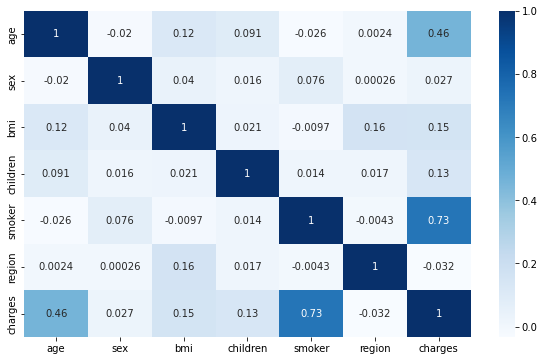

In [25]:
plt.figure(figsize = (10,6))
sns.heatmap(df1.corr(), cmap="Blues",annot=True)

graphycal representation of the above statiscal data, positive linear correlation 

In [26]:
df1.corr().charges.sort_values()

region     -0.032431
sex         0.027209
children    0.134573
bmi         0.153833
age         0.457452
smoker      0.725528
charges     1.000000
Name: charges, dtype: float64

The correlation values in ascending order with respect to the "charges" column in df1, and the value indicate how important the contribution

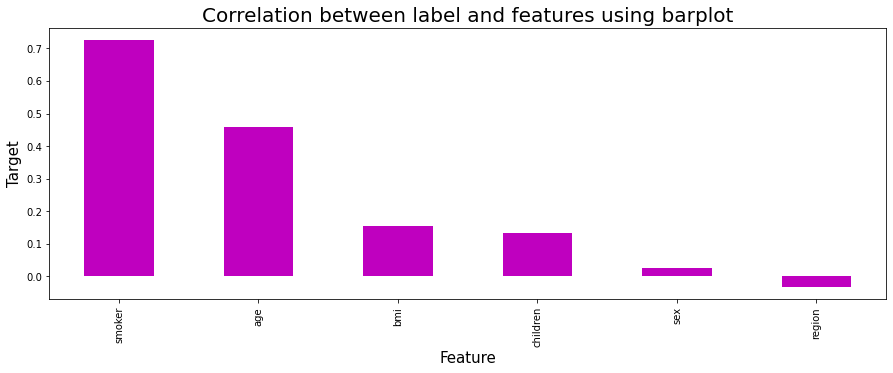

In [32]:
plt.figure(figsize=(15,5))
df1.corr()["charges"].sort_values(ascending = False).drop(["charges"]).plot(kind = "bar", color = "m")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("Target", fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize= 20)
plt.show()

We can observe a positive correlation between the features with the target and means they are all important features and contribute in a very important way. 

we have also suspect multicollinearity problem.

## Splitting the data in indipendent values and dependent value


In [38]:
x = df1.iloc[:, 0:5]
y = df1.iloc[:, 6:7]

In [39]:
# dimension of the features and target
print("x.shape: ", x.shape)
print("y.shape: ", y.shape)

x.shape:  (1327, 5)
y.shape:  (1327, 1)


we can see the same number of rows which means we have the same number of datapoints (good)

## Normalization of the features - Standard Scalarization

In [40]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,age,sex,bmi,children,smoker
0,-1.595888,-1.006805,-0.389582,-1.119802,1.997178
1,-1.708308,0.993241,0.577481,0.499198,-0.500706
2,-0.727415,0.993241,0.457370,1.215200,-0.500706
3,-0.324192,0.993241,-1.366316,-1.119802,-0.500706
4,-0.401400,0.993241,-0.219267,-1.119802,-0.500706
...,...,...,...,...,...
1322,0.799761,0.993241,0.131488,1.215200,-0.500706
1323,-1.708308,-1.006805,0.285713,-1.119802,-0.500706
1324,-1.708308,-1.006805,1.040452,-1.119802,-0.500706
1325,-1.382365,-1.006805,-0.768456,-1.119802,-0.500706


we have converted the strings into numbers by using LabelEncoder(), 
in the "sex" column 0 and 1 represent repectively female and male,
in the "smoker" column 0 and 1 represent repectively no and yes,
in the "region" column 0,1,2,3 represent repectively northeast,northwest,southeast,southwest

## Checking for Variance Inflation Factor (VIF)


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =  pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.023510,age
1,1.008292,sex
2,1.016091,bmi
3,1.009030,children
4,1.006698,smoker


Normally  VIF > 1 indicates some level of multicollinearity. Multicollinearity increases with the VIF. 
Common threshold values for identifying multicollinearity VIF > 10 and therefore I will leave it to look at the outcome of the model (fixed acidity is 7.77)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [43]:
# finding the best Random State

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ", maxAccu, "on Random_state", maxRS)

Maximum r2 score is  0.8396334106323937 on Random_state 50


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=maxRS)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=maxRS)

lr = LinearRegression()
gbr = GradientBoostingRegressor()
adr = AdaBoostRegressor()
ls = Lasso()
rg = Ridge()
dtr = DecisionTreeRegressor()
svR = SVR()
etr = ExtraTreesRegressor()
rfr = RandomForestRegressor()


models = [lr, gbr, adr,ls,rg,dtr,svR,etr,rfr]
for model in models:
    model.fit(x_train, y_train)
    pred_model = model.predict(x_test)
    pred_train = model.predict(x_train)
    print(model)
    print("R2_score: ",  r2_score(y_test, pred_model)*100)
    print("R2_ score on training Data: ", r2_score(y_train, pred_train)*100)
    print("Mean Absolute Error: ", mean_absolute_error(y_test,pred_model))
    print("Mean Squared Error: ", mean_squared_error(y_test, pred_model))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred_model)))
    print('\n')
    

LinearRegression()
R2_score:  83.96334106323937
R2_ score on training Data:  75.38365105272746
Mean Absolute Error:  1.7973281583514835
Mean Squared Error:  6.90216491173403
Root Mean Squared Error:  2.627197158900342


GradientBoostingRegressor()
R2_score:  87.80301892357465
R2_ score on training Data:  86.84003757713617
Mean Absolute Error:  1.346416391198953
Mean Squared Error:  5.249570695914065
Root Mean Squared Error:  2.291194163730797


AdaBoostRegressor()
R2_score:  80.52982916111085
R2_ score on training Data:  77.49962941749725
Mean Absolute Error:  2.2251201815634394
Mean Squared Error:  8.379945630794436
Root Mean Squared Error:  2.894813574445587


Lasso()
R2_score:  74.17776078527665
R2_ score on training Data:  68.83643269277371
Mean Absolute Error:  2.5205448276897187
Mean Squared Error:  11.113870673006158
Root Mean Squared Error:  3.333747241919543


Ridge()
R2_score:  83.95656034470605
R2_ score on training Data:  75.38358210225898
Mean Absolute Error:  1.7990825742

In [76]:
from sklearn.model_selection import cross_val_score

for model in models:
    score = cross_val_score(model,x,y,cv=5, scoring='r2')
    print(model)
    print(score)
    print(score.mean())
    print("Difference between R2 and cross validation score is: ", (r2_score(y_test, pred_model)-score.mean())*100)
    print('\n')

LinearRegression()
[0.76097874 0.70873346 0.7755842  0.73136684 0.7565446 ]
0.746641566347216
Difference between R2 and cross validation score is:  13.971701442247086


GradientBoostingRegressor()
[0.87473669 0.80114035 0.89076497 0.84658961 0.85829043]
0.8543044117022383
Difference between R2 and cross validation score is:  3.2054169067448623


AdaBoostRegressor()
[0.84172047 0.79268275 0.84926545 0.81876957 0.83918574]
0.8283247945158514
Difference between R2 and cross validation score is:  5.803378625383548


Lasso()
[0.76098416 0.70876047 0.77557188 0.73137115 0.75654298]
0.7466461299632466
Difference between R2 and cross validation score is:  13.971245080644024


Ridge()
[0.76099004 0.70883492 0.77546833 0.73142311 0.75651375]
0.7466460287372373
Difference between R2 and cross validation score is:  13.971255203244958


DecisionTreeRegressor()
[0.72756756 0.64954178 0.72912179 0.7135772  0.68576713]
0.7011150930021681
Difference between R2 and cross validation score is:  18.5243487

From the difference of both R2 score and Cross Validation score computed on R2 score we can conclude that GradientBoostingRegressor() is the best fitting and best performance.

## HyperTuning

In [87]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'alpha': [0, 0.5, 1]
}


gscv = GridSearchCV(
    GradientBoostingRegressor(),
    param_grid,
    cv=5,  
    
)

gscv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0, 0.5, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300]})

In [90]:
gscv.best_params_

{'alpha': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [47]:
Model  = GradientBoostingRegressor(alpha =0.5, learning_rate=0.01,max_depth =3, min_samples_leaf =3, min_samples_split =2, n_estimators=300)
Model.fit(x_train, y_train)
pred = Model.predict(x_test)
print(Model)
print("R2_score: ", r2_score(y_test, pred)*100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,pred))
print("Mean Squared Error: ", mean_squared_error(y_test, pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred)))

GradientBoostingRegressor(alpha=0.5, learning_rate=0.01, min_samples_leaf=3,
                          n_estimators=300)
R2_score:  87.28984165440667
Mean Absolute Error:  1.4557845480992981
Mean Squared Error:  5.470441773531821
Root Mean Squared Error:  2.338897555159657


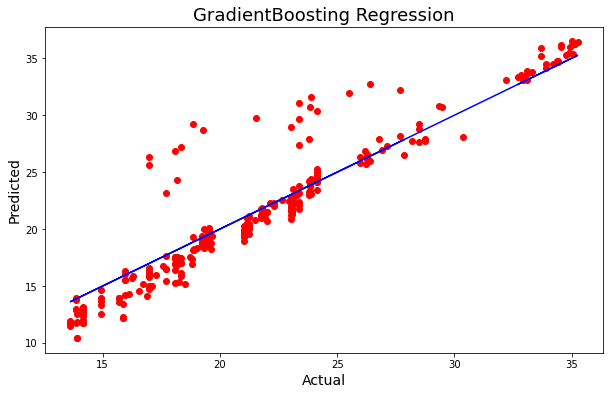

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(x=pred, y=y_test, color="r")
plt.plot(pred, pred, color = "b")
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.title("GradientBoosting Regression", fontsize=18)
plt.show()

as you can see not all the data predicted points are fitted on the best fit line (89%)

In [49]:
import joblib
joblib.dump(Model, 'medical_cost_insurance.pkl')

['medical_cost_insurance.pkl']

In [50]:
import pickle
filename = 'medical_cost_insurance.pkl'
pickle.dump(Model,open(filename, 'wb'))  #saved the model

In [51]:
import pickle
loaded_model = pickle.load(open('medical_cost_insurance.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

87.28984165440667


In [59]:
predictions = loaded_model.predict(x_test)
predictions

array([27.85513035, 17.55531679, 21.01318828, 23.37535186, 23.28329048,
       21.76425197, 21.76425197, 23.36923889, 26.2745075 , 17.71019626,
       21.01723564, 19.28268263, 32.84646868, 23.87707666, 22.3148864 ,
       29.3379767 , 34.20917437, 23.81791695, 13.8763581 , 19.48266875,
       35.14231408, 35.03361625, 18.84432009, 28.75801891, 23.03993744,
       27.66429643, 25.49383144, 21.01318828, 23.81791695, 18.09856156,
       23.04605042, 19.48266875, 23.09909716, 13.90101374, 18.09856156,
       24.15333136, 23.82402992, 26.41734831, 23.09909716, 16.97342443,
       13.62024592, 18.17877109, 16.97342443, 19.32995412, 23.2771775 ,
       33.91623454, 17.28247447, 33.11094509, 21.01723564, 26.29052907,
       23.04605042, 21.99541813, 33.69171789, 19.52347448, 18.17877109,
       17.68710204, 35.00954864, 35.00954864, 19.28268263, 19.00758757,
       23.03993744, 21.90335674, 19.51058045, 34.412009  , 16.97342443,
       21.76425197, 33.91623454, 18.84432009, 18.3442284 , 23.03

In [74]:
y_test_1dimension= y_test['charges'].values
y_test_1dimension


array([26.51840264, 16.73617721, 19.42093623, 22.36555659, 23.19267958,
       20.97294808, 21.73260483, 29.62223381, 26.57395997, 17.60674506,
       20.27491831, 18.86159058, 33.53160359, 31.62185139, 22.03756832,
       30.83960973, 34.46570432, 22.97349966, 11.73436387, 18.55607805,
       36.20634943, 35.41024909, 19.33497881, 27.92425196, 22.7302669 ,
       28.16045915, 31.98898915, 19.50553825, 23.25368131, 16.42842075,
       28.93578229, 19.07533328, 23.52489352, 11.87516961, 17.5711642 ,
       24.10207325, 23.29708437, 32.75655824, 22.68514233, 26.31286767,
       11.9535272 , 16.8063998 , 16.06966498, 19.1747691 , 22.24903798,
       34.50938952, 15.97456506, 33.83843622, 19.26271521, 26.16099661,
       21.27228205, 20.74838348, 35.23738953, 19.11718618, 24.30533754,
       16.53262751, 36.19133722, 36.47256665, 28.66885142, 18.29510335,
       22.4816344 , 21.0028696 , 18.66278155, 34.67067456, 16.07133345,
       21.22585326, 34.12111306, 18.1432783 , 16.99239527, 21.70

In [78]:
comparison = pd.DataFrame({"Original_value_charges":y_test_1dimension, "Predicted_values_charges": predictions})
comparison

,Original_value_charges,Predicted_values_charges
0,26.518403,27.855130
1,16.736177,17.555317
2,19.420936,21.013188
3,22.365557,23.375352
4,23.192680,23.283290
...,...,...
261,17.448469,18.344228
262,16.308763,16.973424
263,23.195380,23.375352
264,15.027145,17.106573


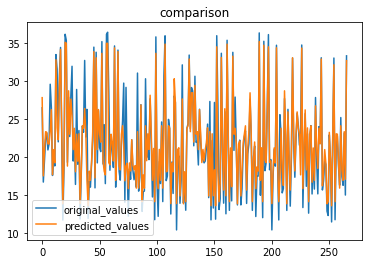

In [84]:
plt.subplot(111)
plt.plot(comparison["Original_value_charges"], label = "original_values")
plt.plot(comparison["Predicted_values_charges"], label = "predicted_values")
plt.title("comparison")
plt.legend()


Can you accurately predict insurance costs?

The trend of the predicted and original_values are very similar and therefore I can confidently say yes.